# Lab 5

# Tasks : Set1

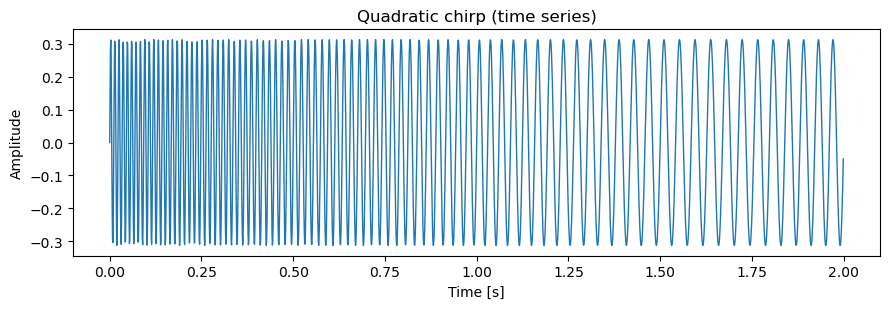

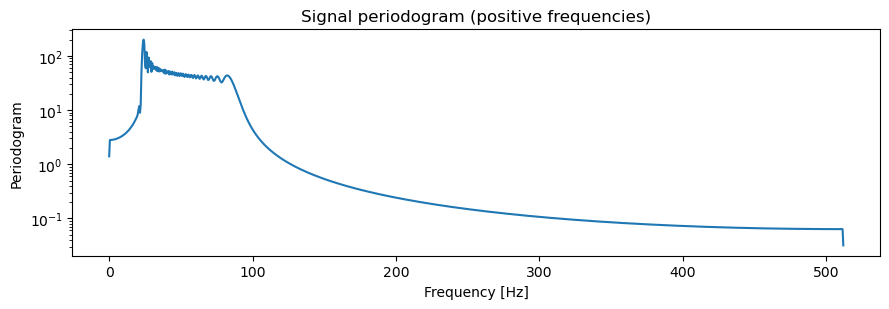

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qc_signal import QCParams, crcbgenqcsig

# 基本参数
N  = 2048
Fs = 1024.0
t  = np.arange(N) / Fs

# 信号参数（可改）
P = QCParams(a1=90.0, a2=-40.0, a3=8.0)   #Transit params
snr = 10.0

# 生成信号
s = crcbgenqcsig(t, snr, P)

# --------- (a) 时域 ----------
plt.figure(figsize=(9,3.2))
plt.plot(t, s, lw=1)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Quadratic chirp (time series)")
plt.tight_layout()

# --------- (b) 正频率 periodogram ----------
# 一侧频谱：正频率（含 DC 和 Nyquist）
S = np.fft.rfft(s)
f = np.fft.rfftfreq(len(s), d=1.0/Fs)

# 简单 periodogram（功率谱密度的常用无偏尺度可以按需要换，这里给出常见定义）
Pxx = np.abs(S)      
# 把一侧谱（除 DC/Nyq）乘 2（与 MATLAB periodogram 一侧谱一致）
if len(Pxx) > 2:
    Pxx[1:-1] *= 2.0

plt.figure(figsize=(9,3.2))
plt.semilogy(f, Pxx)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Periodogram")
plt.title("Signal periodogram (positive frequencies)")
plt.tight_layout()
plt.show()


# Tasks : Set 2 

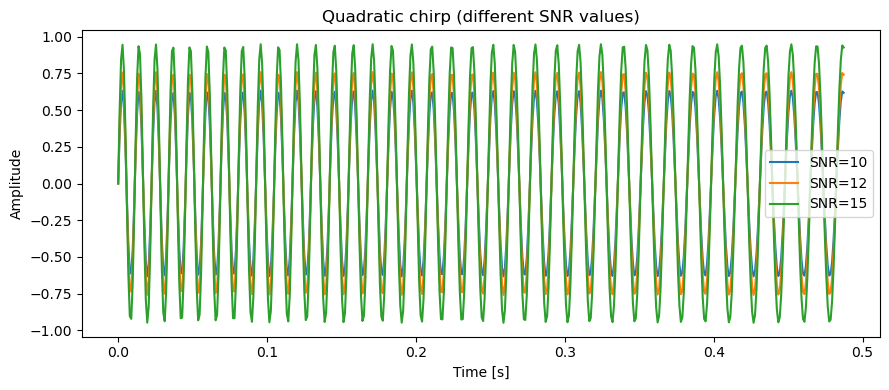

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qc_signal import QCParams, crcbgenqcsig  # 之前写的信号生成函数

# (1) 定义时间轴
Fs = 1024.0
N = 500
dataX = np.arange(N) / Fs  # 等价 MATLAB (0:499)/1024

# (2) 定义参数结构体
P = QCParams(a1=90.0, a2=-40.0, a3=8.0)

# (3) 创建“函数句柄”：固定 dataX 和 P，只变化 snr
H = lambda snr: crcbgenqcsig(dataX, snr, P)

# (4) 画不同 SNR 的时域波形
plt.figure(figsize=(9,4))
for snr in [10, 12, 15]:
    sig = H(snr)
    plt.plot(dataX, sig, label=f"SNR={snr}")

plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Quadratic chirp (different SNR values)")
plt.legend()
plt.tight_layout()
plt.show()


# Exercise #2

In [3]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline  # 老版需要，现代 Jupyter 可省略
import numpy as np
import matplotlib.pyplot as plt

from crcbpso import crcbpso
from crcbpsotestfunc import crcbpsotestfunc

bestFitness: 0.0
bestLocation (std): [0.5 0.5]


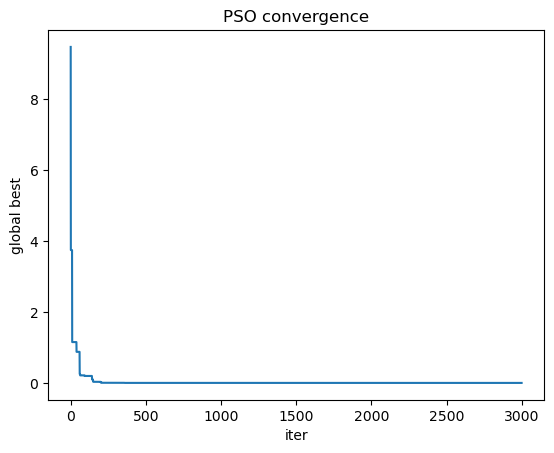

In [4]:
nDim = 2
rmin, rmax = -5.12, 5.12
ffparams = {"rmin": rmin*np.ones(nDim), "rmax": rmax*np.ones(nDim)}

fitFuncHandle = lambda X: crcbpsotestfunc(X, ffparams)

S = crcbpso(fitFuncHandle, nDim,
            p={"popSize":80, "maxSteps":3000},
            output_level=2,
            rng=np.random.default_rng(0))

print("bestFitness:", S["bestFitness"])
print("bestLocation (std):", S["bestLocation"])
plt.plot(S["allBestFit"]); plt.xlabel("iter"); plt.ylabel("global best"); plt.title("PSO convergence"); plt.show()


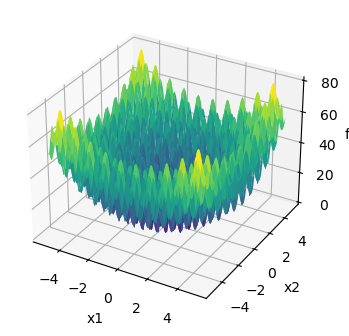

In [5]:
xs = np.linspace(rmin, rmax, 200)
ys = np.linspace(rmin, rmax, 200)
X, Y = np.meshgrid(xs, ys, indexing="xy")
Xstd = (X - rmin)/(rmax - rmin); Ystd = (Y - rmin)/(rmax - rmin)
Z = fitFuncHandle(np.c_[Xstd.ravel(), Ystd.ravel()]).reshape(X.shape)

from mpl_toolkits.mplot3d import Axes3D  # noqa
ax = plt.figure(figsize=(6,4)).add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True, cmap="viridis")
ax.set_xlabel("x1"); ax.set_ylabel("x2"); ax.set_zlabel("f(x)")
plt.show()


In [6]:
for d in [2, 5, 10, 20]:
    ff = {"rmin": -5.12*np.ones(d), "rmax": 5.12*np.ones(d)}
    f  = lambda X: crcbpsotestfunc(X, ff)
    S  = crcbpso(f, d, p={"popSize":80, "maxSteps":3000},
                 output_level=1, rng=np.random.default_rng(0))
    print(f"[{d}D] bestFitness={S['bestFitness']:.4f}, evals={S['totalFuncEvals']}")


[2D] bestFitness=0.0000, evals=239069
[5D] bestFitness=0.0000, evals=234057
[10D] bestFitness=3.9798, evals=222331
[20D] bestFitness=21.4788, evals=190392


In [7]:
for lo, hi in [(-2,2), (-5.12,5.12), (-10,10)]:
    ff = {"rmin": lo*np.ones(2), "rmax": hi*np.ones(2)}
    f  = lambda X: crcbpsotestfunc(X, ff)
    S  = crcbpso(f, 2, p={"popSize":80, "maxSteps":3000},
                 output_level=1, rng=np.random.default_rng(0))
    print(f"range [{lo},{hi}] bestFitness={S['bestFitness']:.4f}")


range [-2,2] bestFitness=0.0000
range [-5.12,5.12] bestFitness=0.0000
range [-10,10] bestFitness=0.0000


# Task : set 1 

bestFitness: 4.440892098500626e-16
bestLocation (std): [0.5 0.5]


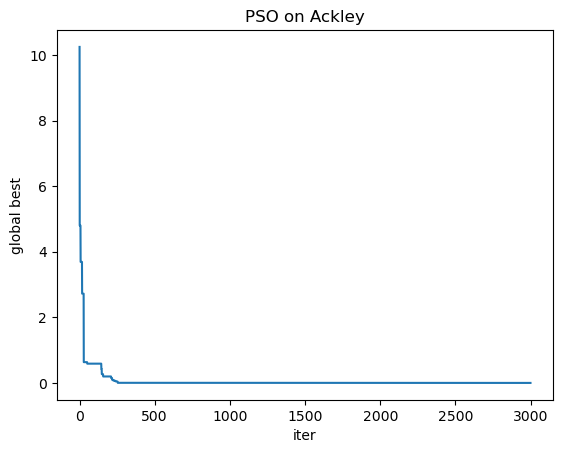

bestLocation (real): [0. 0.]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from crcbpso import crcbpso
from ackley_fitness import crcbpso_ackley

# 维度 & 搜索范围
D = 2
lo, hi = -32.768, 32.768
ff = {"rmin": lo*np.ones(D), "rmax": hi*np.ones(D)}

f = lambda X: crcbpso_ackley(X, ff)

S = crcbpso(f, D, p={"popSize": 80, "maxSteps": 3000}, output_level=2,
            rng=np.random.default_rng(0))

print("bestFitness:", S["bestFitness"])
print("bestLocation (std):", S["bestLocation"])
plt.plot(S["allBestFit"]); plt.xlabel("iter"); plt.ylabel("global best"); plt.title("PSO on Ackley"); plt.show()

# 验证最优点是否接近 0（真实坐标）
best_real = S["bestLocation"] * (hi - lo) + lo
print("bestLocation (real):", best_real)

In [9]:
for steps in [500, 1500, 3000, 6000]:
    S = crcbpso(f, D, p={"popSize":80, "maxSteps":steps},
                output_level=1, rng=np.random.default_rng(0))
    print(f"steps={steps:4d}  bestFitness={S['bestFitness']:.6f}")


steps= 500  bestFitness=0.000000
steps=1500  bestFitness=0.000000
steps=3000  bestFitness=0.000000
steps=6000  bestFitness=0.000000


In [10]:
def best_of_M(M, dim=D, pop=80, steps=3000):
    best = np.inf
    for m in range(M):
        S = crcbpso(f, dim, p={"popSize":pop, "maxSteps":steps},
                    output_level=0, rng=np.random.default_rng(m))
        best = min(best, S["bestFitness"])
    return best

for M in [1, 3, 5, 10]:
    print(f"Best-of-{M}: bestFitness={best_of_M(M):.6f}")

Best-of-1: bestFitness=0.000000
Best-of-3: bestFitness=0.000000
Best-of-5: bestFitness=0.000000
Best-of-10: bestFitness=0.000000


In [11]:
from concurrent.futures import ProcessPoolExecutor, as_completed
import numpy as np
from crcbpso import crcbpso
from crcbpsotestfunc import crcbpsotestfunc

def _one_run(seed, dim, ffparams, pop, steps):
    f = lambda X: crcbpsotestfunc(X, ffparams)
    S = crcbpso(f, dim, p={"popSize":pop, "maxSteps":steps},
                rng=np.random.default_rng(seed))
    return S["bestFitness"], S

def best_of_m_parallel(M=8, dim=2, rmin=-5.12, rmax=5.12, pop=80, steps=3000, max_workers=None):
    ffparams = {"rmin": rmin*np.ones(dim), "rmax": rmax*np.ones(dim)}
    seeds = list(range(M))
    results = []
    with ProcessPoolExecutor(max_workers=max_workers) as ex:
        futs = [ex.submit(_one_run, s, dim, ffparams, pop, steps) for s in seeds]
        for fut in as_completed(futs):
            results.append(fut.result())
    best = min(results, key=lambda t: t[0])
    return best[0], best[1], results  # 最好值，最好那次的S，所有(run_best, S)

In [12]:
best_val, best_S, all_runs = best_of_m_parallel(M=8, dim=10, pop=120, steps=4000)
print("Best-of-8 bestFitness:", best_val)

Best-of-8 bestFitness: 0.0


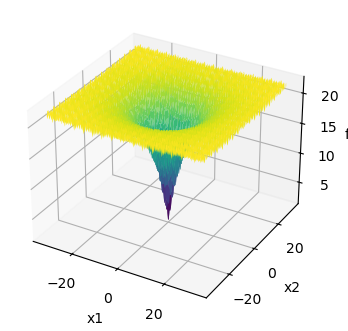

In [13]:
xs = np.linspace(lo, hi, 200); ys = np.linspace(lo, hi, 200)
X, Y = np.meshgrid(xs, ys, indexing="xy")
Xstd = (X - lo)/(hi - lo); Ystd = (Y - lo)/(hi - lo)
Z = f(np.c_[Xstd.ravel(), Ystd.ravel()]).reshape(X.shape)

from mpl_toolkits.mplot3d import Axes3D  # noqa
ax = plt.figure(figsize=(6,4)).add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True, cmap="viridis" )
ax.set_xlabel("x1"); ax.set_ylabel("x2"); ax.set_zlabel("f(x)")
plt.show()

# Tasks

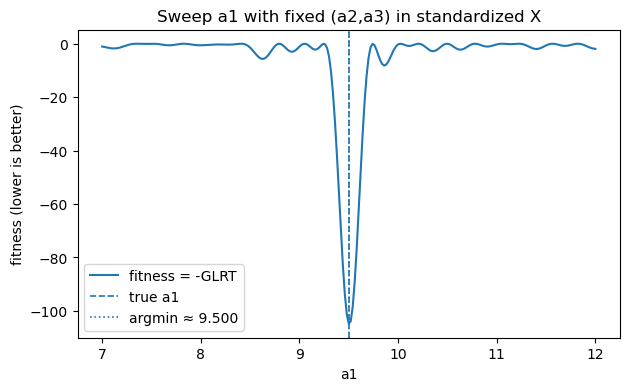

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ---- 你已有的函数（确保从同一个模块导入！）----
from glrtqcsig4pso import glrtqcsig4pso      # 返回 F=-GLRT
from glrtcalc     import crcbgenqcsig, normsig4psd, innerprodpsd

# 频域按 rfft 网格采样 one-sided PSD 的噪声（与 innerprodpsd 离散化完全一致）
def wgn_from_psd(N, psd_posfreq, fs, rng=None):
    rng = np.random.default_rng() if rng is None else rng
    S  = np.asarray(psd_posfreq, float)
    df = fs / N
    K  = len(S)
    sigma_c = np.sqrt(S * df / 2.0)
    re = rng.normal(0, sigma_c)
    im = rng.normal(0, sigma_c)
    X  = re + 1j*im
    # DC 和 Nyquist (若有) 为实数
    X[0] = rng.normal(0, np.sqrt(S[0]*df))
    if (N % 2) == 0:
        X[-1] = rng.normal(0, np.sqrt(S[-1]*df))
    return np.fft.irfft(X, N)

# ================= 1) 生成含色噪声 & SNR=10 的数据 =================
N, fs = 2048, 1024.0
t = np.arange(N)/fs
posFreq = np.fft.rfftfreq(N, 1/fs)

# 课程里的三角形有色 PSD：100~300 Hz 顶起，其他=1
psd = 1.0 + ((posFreq>=100)&(posFreq<=300))*((posFreq-100)*(300-posFreq)/10000.0)

# 真参数
a1_0, a2_0, a3_0 = 9.5, 2.8, 3.2
A = 10.0  # 题目要求 SNR=10

# 生成单位模板并按 A 归一到给定 PSD 下 SNR
sig = crcbgenqcsig(t, 1.0, (a1_0, a2_0, a3_0))
sigA, _ = normsig4psd(sig, fs, psd, A)

# 生成与 PSD 匹配的有色噪声并形成数据
rng = np.random.default_rng(0)
noise = wgn_from_psd(N, psd, fs, rng)
y = noise + sigA

# ================= 2) 构造 a1 的扫描数组（保证包含真值） =================
a1_min, a1_max, a1_step = 7.0, 12.0, 0.02
A1 = np.arange(a1_min, a1_max + 0.5*a1_step, a1_step)

# ========== 3) 给 a2,a3 只设上下界（不必生成数组），保证包含真值 ==========
a2_min, a2_max = 0.0, 5.0
a3_min, a3_max = 0.0, 6.0

# ================= 4) 组装标准化坐标矩阵 X =================
# x1(i) = (A1(i)-a1_min)/(a1_max-a1_min)
# x2  固定为 (a2_0-a2_min)/(a2_max-a2_min)
# x3  固定为 (a3_0-a3_min)/(a3_max-a3_min)
x1 = (A1 - a1_min)/(a1_max - a1_min)
x2 = (a2_0 - a2_min)/(a2_max - a2_min)
x3 = (a3_0 - a3_min)/(a3_max - a3_min)
X  = np.column_stack([x1, x2*np.ones_like(x1), x3*np.ones_like(x1)])

# ================= 5) 组织参数 P 并计算 fitness =================
P = {
    "dataY": y,
    "dataX": t,
    "fs": fs,
    "psdPosFreq": psd,
    "rmin": np.array([a1_min, a2_min, a3_min]),
    "rmax": np.array([a1_max, a2_max, a3_max]),
    # 可选缓存以加速
    "dataXSq": t**2,
    "dataXCb": t**3,
}

# 计算：glrtqcsig4pso 按我们实现是返回 F = -GLRT
F = glrtqcsig4pso(X, P)          # shape=(len(A1),)

# ================= 6) 画出 fitness 曲线（全局最小应在 a1≈a1_0） =================
amin = A1[np.argmin(F)]
plt.figure(figsize=(7,4))
plt.plot(A1, F, label="fitness = -GLRT")
plt.axvline(a1_0, ls='--', lw=1.2, label='true a1')
plt.axvline(amin, ls=':',  lw=1.2, label=f'argmin ≈ {amin:.3f}')
plt.xlabel("a1"); plt.ylabel("fitness (lower is better)")
plt.legend(); plt.title("Sweep a1 with fixed (a2,a3) in standardized X")
plt.show()


# Data realization

In [1]:
import numpy as np
from glrtcalc import crcbgenqcsig, normsig4psd, innerprodpsd
from statgaussnoisegen import wgn_from_psd

# 1) 采样
N  = 512
fs = 512.0
t  = np.arange(N) / fs

# 2) 玩具 PSD：50–100 Hz 抛物线 + 1（其余为 1）
fpos = np.fft.rfftfreq(N, 1/fs)
psd  = np.ones_like(fpos)
m = (fpos >= 50.0) & (fpos <= 100.0)
psd[m] += ((fpos[m] - 50.0) * (100.0 - fpos[m])) / 625.0

# 3) 有色噪声（用你 glrtcalc.statgaussnoisegen）
psd_pairs = np.column_stack([fpos, psd])
rng = np.random.default_rng(123)   # 需要可复现实验就设个种子
noise = wgn_from_psd(N, psd, fs, rng)   # 注意参数顺序：(N, psd_pairs, fltrOrdr, fs)

# 4) 二次啁啾信号（SNR=10, a1=10,a2=3,a3=3）
a1, a2, a3 = 10.0, 3.0, 3.0
A_snr = 10.0
s0 = crcbgenqcsig(t, 1.0, (a1, a2, a3))           # 先生成形状
sig, _ = normsig4psd(s0, fs, psd, A=A_snr)        # 在 PSD 度量下单位化并设 SNR=10

# 5) 数据 = 噪声 + 信号
y = noise + sig

# 验证一下模板确实是 PSD-单位范数 & SNR≈10
q = sig / A_snr
print("||q||_PSD^2 =", innerprodpsd(q, q, fs, psd))   # ~ 1
print("SNR (approx) =", innerprodpsd(sig, q, fs, psd))# ~ 10

# y, t, fs, psd, 以及 (a1,a2,a3) 后续可直接喂给 glrtqcsig / glrtqcsig4pso / PSO


||q||_PSD^2 = 0.9999999999999999
SNR (approx) = 10.0


Best run: 8
Best fitness: -105.65257030531123
Best [a1,a2,a3]: [10.05915089  2.61986452  3.37474516]


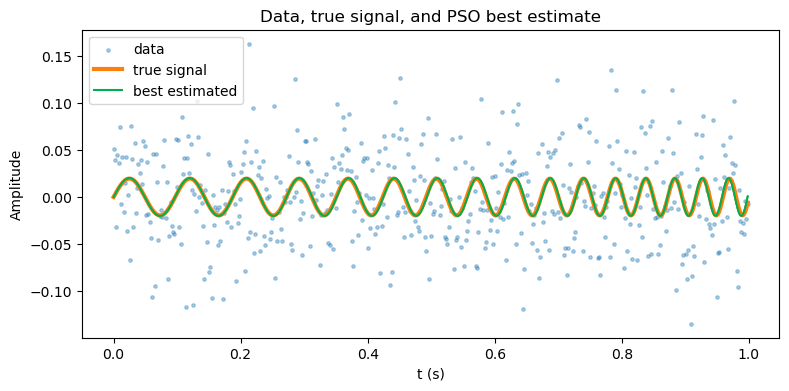

PSD-normalized template match (cosine) = 0.994790379110981


In [2]:
# ====== 接你的 data realization 之后粘贴 ======
import numpy as np
import matplotlib.pyplot as plt
from crcbpso import crcbpso
from glrtqcsig4pso import glrtqcsig4pso
from glrtcalc import innerprodpsd

# --- 1) 组装 PSO 输入 ---
inParams = {
    "dataY": y,
    "dataX": t,
    "dataXSq": t**2,
    "dataXCb": t**3,
    "fs": fs,
    "psdPosFreq": psd,                 # 与 rfft 对齐的一侧 PSD
    "rmin": np.array([  1.0,  1.0,  1.0]),
    "rmax": np.array([180.0, 10.0, 10.0]),
}

# --- 2) PSO 设置 + 多次独立运行（best-of-M） ---
psoParams = {"popSize": 80, "maxSteps": 1000}
nRuns = 8

def fitfunc(X):
    # glrtqcsig4pso 默认返回 F = -GLRT（最小化）
    F, _R = glrtqcsig4pso(X, inParams, return_R=True)
    return F

best = {"fit": np.inf}
all_runs = []

for r in range(nRuns):
    rng = np.random.default_rng(r+1)              # 模拟 parfor: 每次 run 固定不同种子
    out = crcbpso(fitfunc, n_dim=3, p=psoParams, rng=rng)

    # 反标准化拿到 [a1,a2,a3]
    rmin, rmax = inParams["rmin"], inParams["rmax"]
    coefs = rmin + out["bestLocation"] * (rmax - rmin)
    a1h, a2h, a3h = coefs

    # 生成模板并在 PSD 度量下单位化：q_est
    phase = a1h*t + a2h*t**2 + a3h*t**3
    s_est = np.sin(2*np.pi*phase)
    nrm2 = innerprodpsd(s_est, s_est, fs, psd)
    q_est = s_est / np.sqrt(max(nrm2, 1e-12))

    # 幅度 MLE：A_hat = <y, q_est>_PSD；估计信号
    A_hat = innerprodpsd(y, q_est, fs, psd)
    estSig = A_hat * q_est

    all_runs.append({"fit": out["bestFitness"], "coefs": coefs, "q": q_est, "sig": estSig})

    if out["bestFitness"] < best["fit"]:
        best = {"fit": out["bestFitness"], "coefs": coefs, "q": q_est, "sig": estSig, "run": r+1}

print(f"Best run: {best['run']}")
print("Best fitness:", best["fit"])
print("Best [a1,a2,a3]:", best["coefs"])

# --- 3) 画图：数据、真信号、每个 run 的最佳估计 + 最佳估计 ---
plt.figure(figsize=(9,4))
plt.scatter(t, y, s=6, alpha=0.35, label="data")
for rr in all_runs:
    plt.plot(t, rr["sig"], color="C2", alpha=0.25, lw=1)
plt.plot(t, sig, lw=3.0, color="#ff7f0e", label="true signal")
plt.plot(t, best["sig"], lw=1.5, color=(0/255, 176/255, 80/255), label="best estimated")
plt.legend(); plt.xlabel("t (s)"); plt.ylabel("Amplitude")
plt.title("Data, true signal, and PSO best estimate")
plt.show()

# --- 4) 评估模板匹配（PSD 归一）---
q_true = sig / A_snr   # 你的真信号是用 A_snr * q_true 得到的
match = innerprodpsd(q_true, best["q"], fs, psd)  # ∈[-1,1]，越接近 ±1 越好
print("PSD-normalized template match (cosine) =", match)
